# DP1 Removal of missing data : 
Consider the dataset dataIsRemovalAllowed which has the following
three columns: 
- gender (binary coded), 
- age 
- preference score for a product. 
The goal is to assess the mean preference for a product (the preference is a score between 0 and 10).
<br> 

(a) Can rows with missing data be removed without significantly influencing the result?
The answer is NO. Explain graphically, why nonrandom missingness of data here would lead to
an underestimation of the preference score of the product.

1. scatter plot
2. missing preferencesscore df
3. boxplot
4. analiza wiek score / płęc score

In [80]:
# libraries used in the assigement
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [12]:
# loading data from the csv file
data_is_removal_allowed_csv= 'dataIsRemovalAllowed.csv'

# Create a new DataFrame with the row to add
new_row = pd.DataFrame({'1': [1], '67': [67], 'NaN':[np.nan]})


df_removal = pd.read_csv(data_is_removal_allowed_csv)

df_removal = pd.concat([new_row, df_removal], ignore_index=True)


df_removal.head()


,1,67,NaN
0,1,67,NaN
1,0,29,3.3435
2,1,14,2.9387
3,1,44,NaN
4,1,61,NaN


In [13]:
# adding column names to the data frame
columns = pd.Series(['gender', 'age', 'preference'])
df_removal.columns = columns


df_removal.head(20)

,gender,age,preference
0,1,67,NaN
1,0,29,3.3435
2,1,14,2.9387
3,1,44,NaN
4,1,61,NaN
5,1,23,3.7694
6,1,66,NaN
7,0,60,NaN
8,1,37,4.7295
9,1,41,NaN


#### Mean preference for the product

In [15]:
mean_preference = df_removal['preference'].mean()

print("Mean preference for the product is : ", np.round(mean_preference,3))

Mean preference for the product is :  4.531


<Axes: >

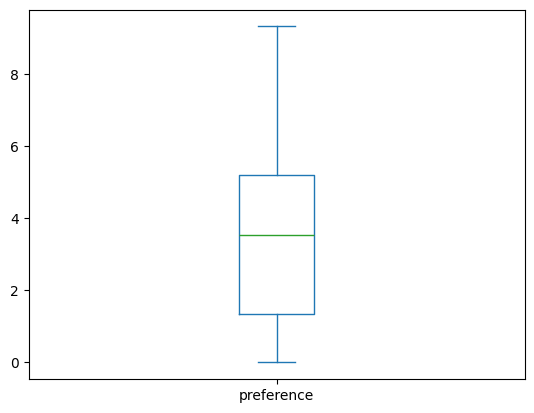

In [41]:
df_removal[df_removal['preference'].isna() is True] = 0
df_removal[['preference']].plot(kind='box')

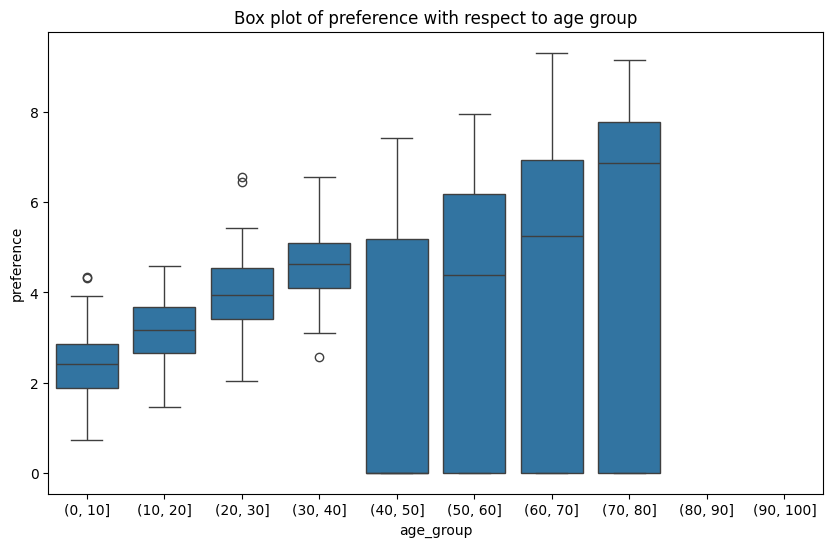

In [43]:
# box plot fot the preference with respect to age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='preference', data=df_removal)
plt.title('Box plot of preference with respect to age group')
plt.show()

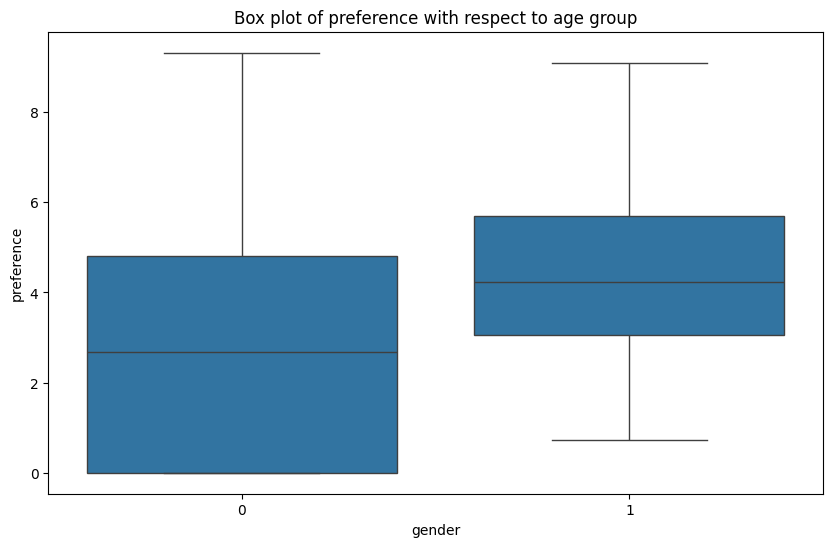

In [44]:
# box plot fot the preference with respect to age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='preference', data=df_removal)
plt.title('Box plot of preference with respect to age group')
plt.show()

#### Mean preference for the product with age group

In [16]:
# creating age groups
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# adding age group coumn to the data frame
df_removal['age_group'] = pd.cut(df_removal['age'], bins)

df_removal.head(20)

,gender,age,preference,age_group
0,0,29,3.3435,"(20, 30]"
1,1,14,2.9387,"(10, 20]"
2,1,44,NaN,"(40, 50]"
3,1,61,NaN,"(60, 70]"
4,1,23,3.7694,"(20, 30]"
5,1,66,NaN,"(60, 70]"
6,0,60,NaN,"(50, 60]"
7,1,37,4.7295,"(30, 40]"
8,1,41,NaN,"(40, 50]"
9,1,14,2.2421,"(10, 20]"


In [28]:
mean_age_roup_preference = df_removal.groupby('age_group')['preference'].mean()

mean_age_roup_preference

C:\Users\barte\AppData\Local\Temp\ipykernel_16196\2703978864.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_age_roup_preference = df_removal.groupby('age_group')['preference'].mean()


age_group
(0, 10]      2.395965
(10, 20]     3.140262
(20, 30]     3.950999
(30, 40]     4.661174
(40, 50]     5.337178
(50, 60]     6.135708
(60, 70]     6.875067
(70, 80]     7.628851
(80, 90]          NaN
(90, 100]         NaN
Name: preference, dtype: float64

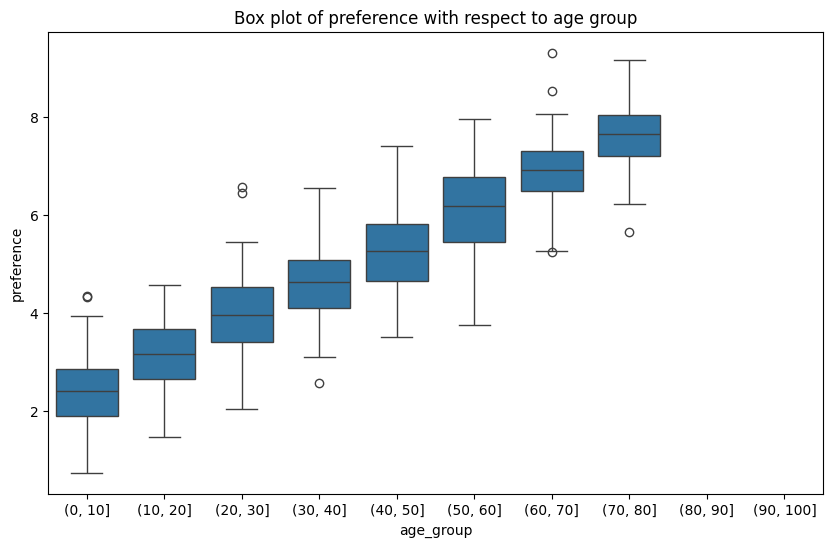

In [24]:
# box plot fot the preference with respect to age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='preference', data=df_removal)
plt.title('Box plot of preference with respect to age group')
plt.show()

#### Rmoving missing values of for preference

In [29]:
df_removal_clear = df_removal.copy()
df_removal_clear.dropna(inplace=True)

df_removal_clear.head(20)


,gender,age,preference,age_group
0,0,29,3.3435,"(20, 30]"
1,1,14,2.9387,"(10, 20]"
4,1,23,3.7694,"(20, 30]"
7,1,37,4.7295,"(30, 40]"
9,1,14,2.2421,"(10, 20]"
11,1,8,2.8678,"(0, 10]"
13,0,9,2.5376,"(0, 10]"
15,1,40,5.9453,"(30, 40]"
17,1,34,5.0594,"(30, 40]"
18,0,17,3.8356,"(10, 20]"


<Axes: >

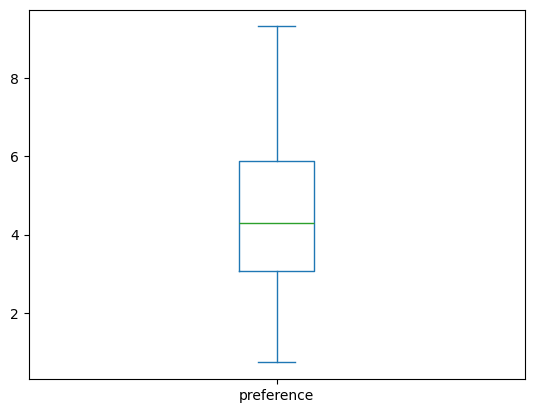

In [42]:
df_removal_clear[['preference']].plot(kind='box')

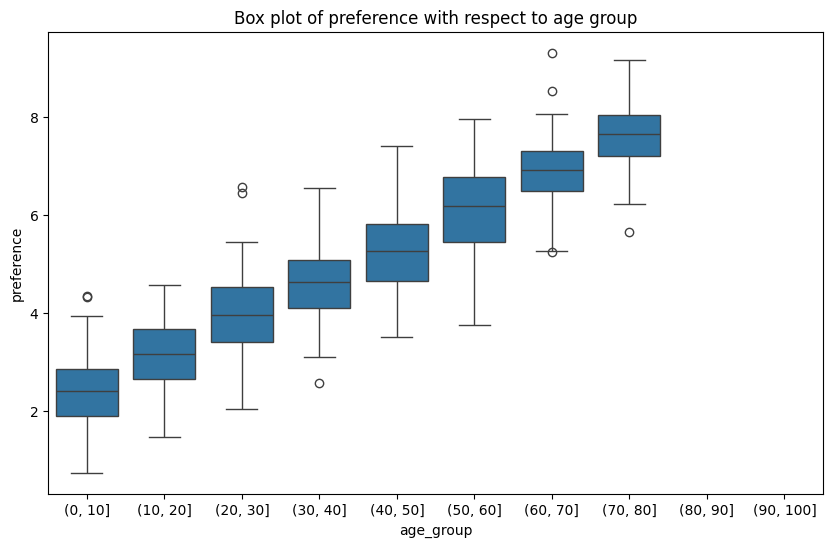

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='preference', data=df_removal_clear)
plt.title('Box plot of preference with respect to age group')
plt.show()

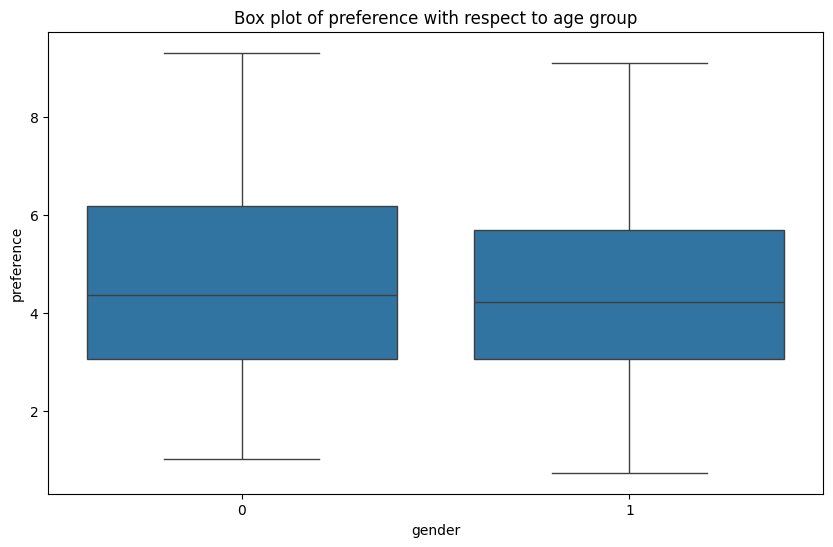

In [45]:
# box plot fot the preference with respect to age group
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='preference', data=df_removal_clear)
plt.title('Box plot of preference with respect to age group')
plt.show()

# DP2 Data Imputation for timeseries data

Load the dataset ex22PM10imputation containing timeseries of PM10 values of one year.
The first and the second column contain the same timeseries, but in the first column, 300 values are
missing (entries Nan where Nan stands for Not a number). 
The goal is to impute 300 values using different methods and compare them to the real ones (in the second column).


Program and apply the following 4 methods for data imputation.

Hint1: the time interval is 30 minutes, so a day consists of 48 values.

Hint2: to make programming easier, values are only missing one at a time, i.e. there are no missingvalues following each other.


- (a) Substitute the Nan values by taking the last known value.


- (b) Substitute by linear interpolation using the last known and the next known value.


- (c) Substitute with the value of the day before at the same time.


- (d) Substitute with the mean value of the whole time series (generic method not only applicable for timeseries).


In [22]:
# loading data set

timeseries_data_csv = 'ex22PM10imputation.csv'

timeseries_df = pd.read_csv(timeseries_data_csv, delimiter=';')

# Create a new DataFrame with the row to add
new_row_ts = pd.DataFrame({'642.2': [642.2], '642.2.1': [642.2]})

# Concatenate the new row with the existing DataFrame
timeseries_df = pd.concat([new_row_ts, timeseries_df], ignore_index=True)

timeseries_df.head(100)

,642.2,642.2.1
0,642.2,642.2
1,336.1,336.1
2,242.7,242.7
3,201.1,201.1
4,165.7,165.7
...,...,...
95,14.6,14.6
96,14.6,14.6
97,15.3,15.3
98,16.2,16.2


In [23]:
# change the column names
columns = pd.Series(['timeseries_1', 'timeseries_2'])

timeseries_df.columns = columns

timeseries_df.head(100)

,timeseries_1,timeseries_2
0,642.2,642.2
1,336.1,336.1
2,242.7,242.7
3,201.1,201.1
4,165.7,165.7
...,...,...
95,14.6,14.6
96,14.6,14.6
97,15.3,15.3
98,16.2,16.2


In [24]:
mean_value_before_imputation = timeseries_df['timeseries_1'].mean()
mean_value_before_imputation_second = timeseries_df['timeseries_2'].mean()

print("Mean value before imputation is : ", np.round(mean_value_before_imputation,3))
print("Mean value before imputation is : ", np.round(mean_value_before_imputation_second,3))

Mean value before imputation is :  20.86
Mean value before imputation is :  20.868


### (a) Substitute the Nan values by taking the last known value.

In [25]:
timeseries_values_1 = timeseries_df['timeseries_1'].values.tolist()

new_list = []
last_value = None

for value in timeseries_values_1:
    if pd.notna(value):
        new_list.append(float(value))
        last_value = float(value)
    else:
        new_list.append(last_value)

a_df = timeseries_df.copy()
a_df['timeseries_1'] = new_list

a_df.head(100)

,timeseries_1,timeseries_2
0,642.2,642.2
1,336.1,336.1
2,242.7,242.7
3,201.1,201.1
4,165.7,165.7
...,...,...
95,14.6,14.6
96,14.6,14.6
97,15.3,15.3
98,16.2,16.2


In [37]:
mean_value_a = a_df['timeseries_1'].mean()

print("Mean value for the timeseries_1 is : ", np.round(mean_value_a,5))
print("Mean value before imputation is : ", np.round(mean_value_before_imputation,5))
print("Mean value before imputation (second table) : ", np.round(mean_value_before_imputation_second,5))

difference_a = mean_value_before_imputation_second - mean_value_a

print("Difference between the mean values is : ", np.round(difference_a,5))

Mean value for the timeseries_1 is :  20.86003
Mean value before imputation is :  20.8598
Mean value before imputation (second table) :  20.86755
Difference between the mean values is :  0.00752


### (b) Substitute by linear interpolation using the last known and the next known value.

In [27]:
def liner_interpolation(last_value: float, next_value: float) -> float:
    return (last_value + next_value) / 2


def find_next_value(index: int, values: list) -> float:
    next_value = None
    for i in range(index + 1, len(values)):
        if pd.notna(values[i]):
            next_value = values[i]
            break
    return next_value


timeseries_values_b = timeseries_df['timeseries_1'].values.tolist()

new_list = []
last_value = None
next_value = None

for index, value in enumerate(timeseries_values_b):
    if pd.notna(value):
        new_list.append(float(value))
        last_value = float(value)
    else:
        next_value = find_next_value(index, timeseries_values_b)
        liner_interpolation_value = liner_interpolation(last_value, next_value)
        new_list.append(liner_interpolation_value)

print(timeseries_values_b)
print(new_list)

[642.2, 336.1, 242.7, 201.1, 165.7, 120.4, 113.4, 104.5, 93.9, 87.9, 69.0, 49.5, 36.6, 59.1, 57.1, 54.0, 52.7, 46.7, 46.0, 31.6, 29.7, 27.6, 28.1, 26.8, 23.2, 22.8, 25.3, 25.6, 26.4, 25.7, 28.1, 33.3, 32.4, 34.7, 36.2, 57.2, 55.6, 56.9, 65.4, 52.4, 39.5, 40.9, 48.1, 49.9, 51.0, 39.8, 35.2, 32.7, 31.4, 32.2, 32.3, 32.4, 29.0, 29.2, 31.7, 32.7, 33.6, 30.3, 32.5, 24.1, 22.1, 22.1, 22.5, 22.0, 18.2, 15.9, 15.3, 15.6, 12.2, 11.5, 12.8, 18.3, 21.2, 17.1, 13.9, 14.0, 9.8, 10.4, 11.8, 11.9, 14.2, 14.0, 12.5, 11.7, 12.2, 14.7, 16.4, 24.0, 19.4, 21.2, 18.5, 19.6, 19.6, 18.0, 16.8, 14.6, 14.6, 15.3, 16.2, nan, 13.2, 11.6, 11.5, 13.0, 12.6, 11.9, 11.7, 10.3, 9.8, 9.4, 9.7, 9.3, 8.7, 9.0, 8.7, 8.5, 7.5, 8.2, 8.2, 7.6, 8.2, 9.5, 10.1, 11.0, 14.1, 13.2, 13.5, 11.6, 11.3, 9.4, 9.7, 11.5, 11.7, 13.9, 16.6, 17.1, 20.9, 17.6, 16.6, 16.8, 15.9, 16.1, 21.5, 21.4, 17.1, 16.9, 17.8, 18.4, 17.7, 16.9, 16.7, 15.4, 15.5, 15.5, 8.8, 7.7, 5.2, nan, 4.7, 5.8, 6.2, 6.3, 5.8, 5.8, 6.9, 7.3, 6.1, 10.3, 10.5, 6.9, 6.5

In [38]:
mean_value_b = np.round(np.mean(new_list), 5)

print("Mean value for the timeseries_1 after linear interpolation is : ", mean_value_b)
print("Mean value before imputation is : ", np.round(mean_value_before_imputation,5))
print("Mean value before imputation (second table) : ", np.round(mean_value_before_imputation_second,5))

difference_b = mean_value_before_imputation_second - mean_value_b

print("Difference between the mean values is : ", np.round(difference_b,5))

Mean value for the timeseries_1 after linear interpolation is :  20.85331
Mean value before imputation is :  20.8598
Mean value before imputation (second table) :  20.86755
Difference between the mean values is :  0.01424


### (c) Substitute with the value of the day before at the same time.

In [29]:
def find_value_from_day_before(index: int, values: list) -> float:
    previous_index = index - 48
    previous_value = values[previous_index]
    return previous_value, previous_index

timeseries_values_c = timeseries_df['timeseries_1'].values.tolist()

new_list = []

for index, value in enumerate(timeseries_values_c):
    if pd.notna(value):
        new_list.append(float(value))
    else:
        previous_value, previous_index = find_value_from_day_before(index, timeseries_values_c)
        while pd.isna(previous_value):
            previous_value, previous_index = find_value_from_day_before(previous_index, timeseries_values_c)
            break
        new_list.append(previous_value)

print(timeseries_values_c)
print(new_list)




[642.2, 336.1, 242.7, 201.1, 165.7, 120.4, 113.4, 104.5, 93.9, 87.9, 69.0, 49.5, 36.6, 59.1, 57.1, 54.0, 52.7, 46.7, 46.0, 31.6, 29.7, 27.6, 28.1, 26.8, 23.2, 22.8, 25.3, 25.6, 26.4, 25.7, 28.1, 33.3, 32.4, 34.7, 36.2, 57.2, 55.6, 56.9, 65.4, 52.4, 39.5, 40.9, 48.1, 49.9, 51.0, 39.8, 35.2, 32.7, 31.4, 32.2, 32.3, 32.4, 29.0, 29.2, 31.7, 32.7, 33.6, 30.3, 32.5, 24.1, 22.1, 22.1, 22.5, 22.0, 18.2, 15.9, 15.3, 15.6, 12.2, 11.5, 12.8, 18.3, 21.2, 17.1, 13.9, 14.0, 9.8, 10.4, 11.8, 11.9, 14.2, 14.0, 12.5, 11.7, 12.2, 14.7, 16.4, 24.0, 19.4, 21.2, 18.5, 19.6, 19.6, 18.0, 16.8, 14.6, 14.6, 15.3, 16.2, nan, 13.2, 11.6, 11.5, 13.0, 12.6, 11.9, 11.7, 10.3, 9.8, 9.4, 9.7, 9.3, 8.7, 9.0, 8.7, 8.5, 7.5, 8.2, 8.2, 7.6, 8.2, 9.5, 10.1, 11.0, 14.1, 13.2, 13.5, 11.6, 11.3, 9.4, 9.7, 11.5, 11.7, 13.9, 16.6, 17.1, 20.9, 17.6, 16.6, 16.8, 15.9, 16.1, 21.5, 21.4, 17.1, 16.9, 17.8, 18.4, 17.7, 16.9, 16.7, 15.4, 15.5, 15.5, 8.8, 7.7, 5.2, nan, 4.7, 5.8, 6.2, 6.3, 5.8, 5.8, 6.9, 7.3, 6.1, 10.3, 10.5, 6.9, 6.5

In [39]:
mean_value_c = np.round(np.mean(new_list), 5)

print("Mean value for the timeseries_1 after inserting values from day before: ", mean_value_c)
print("Mean value before imputation is : ", np.round(mean_value_before_imputation,5))
print("Mean value before imputation (second table) : ", np.round(mean_value_before_imputation_second,5))

difference_c = mean_value_before_imputation_second - mean_value_c

print("Difference between the mean values is : ", np.round(difference_c,5))

Mean value for the timeseries_1 after inserting values from day before:  20.85331
Mean value before imputation is :  20.8598
Mean value before imputation (second table) :  20.86755
Difference between the mean values is :  0.01424


### (d) Substitute with the mean value of the whole time series (generic method not only applicable for timeseries).

In [40]:
mean_value = timeseries_df['timeseries_1'].mean()

timeseries_d = timeseries_df.copy()
timeseries_d['timeseries_1'].fillna(mean_value, inplace=True)

mean_value_d = np.round(timeseries_d['timeseries_1'].mean(), 5)

print("Mean value for the timeseries_1 after inserting mean value: ", mean_value_d)
print("Mean value before imputation is : ", np.round(mean_value_before_imputation,5))
print("Mean value before imputation (second table) : ", np.round(mean_value_before_imputation_second,5))

difference_d = mean_value_before_imputation_second - mean_value_d

print("Difference between the mean values is : ", np.round(difference_d,5))

Mean value for the timeseries_1 after inserting mean value:  20.8598
Mean value before imputation is :  20.8598
Mean value before imputation (second table) :  20.86755
Difference between the mean values is :  0.00775


In [41]:
differences = [(difference_a, "a)"), (difference_b, "b)"), (difference_c, "c)"), (difference_d, "d)")]

sorted_differences = sorted(differences, key=lambda x: x[0])

for diff in sorted_differences:
    print(f"{diff[1]} Difference: {diff[0]}")


a) Difference: 0.007517123287669847
d) Difference: 0.0077456621004543535
b) Difference: 0.014235662100453794
c) Difference: 0.014235662100453794


# DP3 Discussion of the data imputation result using EDA

Describe the results of the data imputation example before using EDA. Answer the following questions using appropriate graphics.
An important, recurring topic in data analysis is evaluation, especially computation and description
of errors: besides choosing suitable graphics (suitable for the question to be answered) one also needs
to choose a suitable error measure and often also a reference for sake of comparison.
(a) Which of the 4 data imputation methods is best suited for this timeseries? For the following 3
questions choose this method.
(b) Is the imputation error high? Can it be expected that imputation does not harm the following
analysis?
(c) What is the distribution of the imputation error? What is the probability, that the relative
error is more than for example 5%? (Hint: you will probably need 2 graphics here)
(d) Plot the whole timeseries and add the imputed data points. We will use this plot to discuss together why this result is not unexpected for this special timeseries and if imputation is expected
to harm following analyses or not.

In [ ]:
@TODO


# DP4 Data Imputation with regression based on other variables
(a) Apply data imputation to the missing PM10 values using a properly done linear regression
with (a subset of) other, known variables. Take care to properly choose the(se) variable(s) for
example based on your EDA in exercise 1.4.

(b) As we do not know the real value, no imputation error can be computed. But we can compare
methods. Therefore also do the imputation with the last value. Then compare the imputed
values using the regression-method with the imputed values using the last-value-method by
making a suitable graphic

### JAK BYM TO ZROBIŁ : 
1) sprawdzam liniową zależność z każdym z innych featurów i wybieram ten z najmniejszym błędem
2) na podstawie najlepszego liniowego dobieram nowe brakujące parametry
3) oblicz error porównawczy z ostatnią znaną wartością : (różnice między poszczególnymi pomiarami, różnice średnich, różnice śrdniej lastknown i średniej regresja liniowa)

In [44]:
pollution_csv = "pollutionData.csv"

pollution_df = pd.read_csv(pollution_csv)

pollution_df.head()


,PM10Lehen,NOXLehen,RFLehen,LTLehen,O3Lehen,PM10Rud,MOXRud,RPRud,LTRud,CORud,WG,WT,GS
0,642.2,77.4,83.0,0.1,2.0,251.8,67.0,81.0,0.7,0.60,2.7,153.0,5.0
1,336.1,47.4,81.0,0.3,2.0,244.2,133.8,78.0,0.9,0.77,3.7,156.0,5.0
2,242.7,42.5,80.0,0.2,2.0,282.3,145.9,81.0,0.2,0.89,2.9,166.0,4.0
3,201.1,41.1,82.0,-0.3,2.0,362.4,177.1,79.0,0.7,0.77,2.5,137.0,4.0
4,165.7,38.2,83.0,-0.5,2.0,281.0,116.7,77.0,0.6,0.62,1.8,144.0,4.0


In [124]:
pollution_pm = pollution_df[["PM10Lehen", "PM10Rud"]].copy()

pollution_pm.dropna(inplace=True)

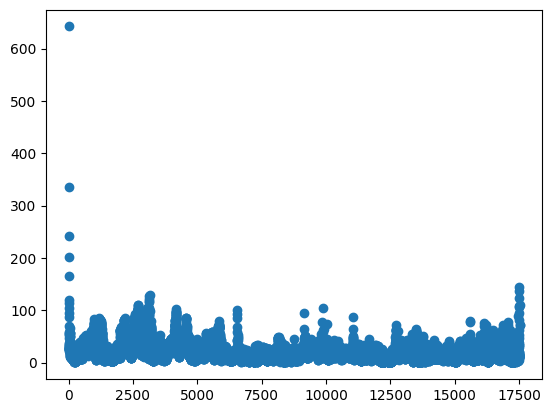

In [79]:
plt.scatter(pollution_pm.index, pollution_pm["PM10Lehen"])


Coefficients: 
 [[0.84504115]]
Mean squared error: 168.52
Coefficient of determination: 0.52


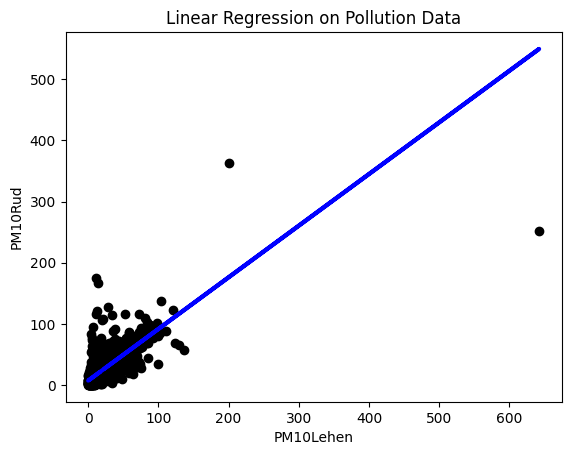

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Extract the feature and target variables
X = pollution_pm["PM10Lehen"].values.reshape(-1, 1)
y = pollution_pm["PM10Rud"].values.reshape(-1, 1)
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xlabel('PM10Lehen')
plt.ylabel('PM10Rud')
plt.title('Linear Regression on Pollution Data')
plt.show()

In [137]:
def linear_regression_for_a_day(data_frame):
    # Extract the feature and target variables
    X = pollution_pm["PM10Lehen"].values.reshape(-1, 1)
    y = pollution_pm["PM10Rud"].values.reshape(-1, 1)
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

    # Create linear regression object
    regr = LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print("Coefficients: \n", regr.coef_)
    # The mean squared error

    error = mean_squared_error(y_test, y_pred)

    print("Mean squared error: %.2f" % error)
    # The coefficient of determination: 1 is perfect prediction
    print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

    # # Plot outputs
    # plt.scatter(X_test, y_test, color="black")
    # plt.plot(X_test, y_pred, color="blue", linewidth=3)

    # plt.xlabel('PM10Lehen')
    # plt.ylabel('Target')
    # plt.title('Linear Regression on Pollution Data')
    # plt.show()

    return error



def split_data_frame_into_days(data_frame):
    data_frames = []
    x = 0
    y = 48
    while y < len(data_frame):
        daily_data_frame = data_frame[x:y]
        data_frames.append(daily_data_frame)
        x += 48
        y += 48
    return data_frames


daily_df = split_data_frame_into_days(pollution_pm)

for index, df in enumerate(daily_df):
    df.dropna(inplace=True)
    errors = []
    print(f"Day {index + 1}")
    error = linear_regression_for_a_day(df)
    errors.append(error)

print(f"Mean error: {np.mean(errors)}")



C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

Day 1
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 2
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 3
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 4
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 5
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 6
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 7
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 8
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 9
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 10
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 11
Co

C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 128
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 129
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 130
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 131
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 132
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 133
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 134
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 135
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 136
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.5

C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 182
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 183
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 184
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 185
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 186
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 187
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 188
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 189
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 190
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.5

C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 228
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 229
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 230
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 231
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 232
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 233
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 234
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 235
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 236
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.5

C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 271
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 272
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 273
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 274
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 275
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 276
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 277
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 278
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 279
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.5

C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

Coefficient of determination: 0.58
Day 330
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 331
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 332
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 333
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 334
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 335
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 336
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 337
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 338
Coefficients: 
 [[0.85874079]]
Mean squared error: 133.06
Coefficient of determination: 0.58
Day 339
Coefficients: 
 [[0.85874079]]
Mean squared erro

C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local\Temp\ipykernel_1104\4195664292.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)
C:\Users\barte\AppData\Local

In [131]:
print(f"Mean error: {np.mean(errors)}")

Mean error: 133.05858344847778
